# Capitulo 2. Proyecto de Machine Learning

👀: verifica que si hayas instalado las librerías que vas a necesitar

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [1]:
## Importamos nuestras librerias principales panda, numpy, matplotlib, os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.options.display.max_columns = 20


In [2]:
import kagglehub

# Download latest version
path1 = kagglehub.dataset_download("imanollaconcha/barcelona-fotocasa-housingprices")

print("Path to dataset files:", path1)

Path to dataset files: C:\Users\Techie10\.cache\kagglehub\datasets\imanollaconcha\barcelona-fotocasa-housingprices\versions\1


In [3]:
os.listdir(path1)

['Barcelona_Fotocasa_HousingPrices.csv']

***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [4]:
import pandas as pd
import os

country_file = os.path.join(path1, 'Barcelona_Fotocasa_HousingPrices.csv')

Barcelona_Housing = pd.read_csv(country_file)

Barcelona_Salary = pd.read_csv("2022_renda_disponible_llars_per_persona.csv")

In [5]:
Barcelona_Housing

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636
...,...,...,...,...,...,...,...,...,...,...
8183,8183,1075,2,2,False,False,65,flat,Gràcia,16.538462
8184,8184,1500,3,2,True,False,110,flat,Eixample,13.636364
8185,8185,1500,2,2,True,True,90,flat,Sarria-Sant Gervasi,16.666667
8186,8186,1500,3,2,True,False,110,flat,Eixample,13.636364


In [6]:
import pandas as pd
import numpy as np # Importamos numpy para el reemplazo condicional

# Asumimos que tu DataFrame se llama df_housing

# 1. Renombrar la columna 'neighborhood' a 'distrito' y pasarla a minúsculas
Barcelona_Housing = Barcelona_Housing.rename(columns={'neighborhood': 'distrito'})
Barcelona_Housing['distrito'] = Barcelona_Housing['distrito'].str.lower().str.strip()

# 2. Corregir inconsistencias de formato (la limpieza es el mapeo)
Barcelona_Housing['distrito'] = Barcelona_Housing['distrito'].str.replace('-', '', regex=False).str.replace(' ', '', regex=False)

# Usamos un diccionario de corrección específico para tu dataset:
correcciones = {
    'hortaguinardo': 'horta-guinardó', # Horta- Guinardo
    'sarriasantgervasi': 'sarrià-sant gervasi', # Sarria-Sant Gervasi
    'santsmontjuic': 'sants-montjuïc', # Si hay esta variación (Sants-Montjuïc)
    'lescorts': 'les corts' # Si hay esta variación
    # Añade aquí cualquier otra corrección que encuentres, como 'ciutatvella'
}

# Aplicamos las correcciones conocidas
Barcelona_Housing['distrito'] = Barcelona_Housing['distrito'].replace(correcciones, regex=True)


# 3. Verificación de las primeras filas
print("--- DataFrame con la columna 'distrito' limpia ---")
print(Barcelona_Housing[['distrito', 'square_meters_price']].head())

print("\n--- Conteo de Valores (Verificación) ---")
print(Barcelona_Housing['distrito'].value_counts())

--- DataFrame con la columna 'distrito' limpia ---
         distrito  square_meters_price
0  horta-guinardó            12.500000
1      santandreu            13.050847
2          gràcia            43.333333
3     ciutatvella            40.000000
4      santandreu            16.363636

--- Conteo de Valores (Verificación) ---
distrito
eixample               2401
sarrià-sant gervasi    1396
ciutatvella            1365
gràcia                  688
santmartí               617
santsmontjuïc           590
les corts               524
horta-guinardó          315
santandreu              178
noubarris               114
Name: count, dtype: int64


In [7]:
# 1. Normalizar completamente el contenido de la columna 'distrito'

# Este paso asegura que nombres como 'ciutatvella' (head) y 'ciutatvella' (value_counts) sean idénticos
Barcelona_Housing['distrito'] = Barcelona_Housing['distrito'].replace({
    'ciutatvella': 'ciutat vella', # Ya limpio
    'eixample': 'eixample', # Ya limpio
    'santsmontjuic': 'sants-montjuïc',
    'lescorts': 'les corts',
    'sarriasantgervasi': 'sarrià-sant gervasi',
    'gracia': 'gràcia',
    'hortaguinardo': 'horta-guinardó',
    'noubarris': 'nou barris',
    'santandreu': 'sant andreu',
    'santmarti': 'sant martí'
})

print("\n--- Conteo de Valores (NORMALIZADO) ---")
print(Barcelona_Housing['distrito'].value_counts())


--- Conteo de Valores (NORMALIZADO) ---
distrito
eixample               2401
sarrià-sant gervasi    1396
ciutat vella           1365
gràcia                  688
santmartí               617
santsmontjuïc           590
les corts               524
horta-guinardó          315
sant andreu             178
nou barris              114
Name: count, dtype: int64


In [8]:
Barcelona_Salary

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Euros
0,2022,1,Ciutat Vella,1,el Raval,1,15940
1,2022,1,Ciutat Vella,1,el Raval,2,13841
2,2022,1,Ciutat Vella,1,el Raval,3,12732
3,2022,1,Ciutat Vella,1,el Raval,4,15749
4,2022,1,Ciutat Vella,1,el Raval,5,13190
...,...,...,...,...,...,...,...
1063,2022,10,Sant Martí,73,la Verneda i la Pau,143,16402
1064,2022,10,Sant Martí,65,el Clot,234,21047
1065,2022,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,235,18576
1066,2022,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,236,19369


In [9]:
print(Barcelona_Salary.columns.tolist())

['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Seccio_Censal', 'Import_Euros']


In [10]:
import pandas as pd

# Suponiendo que el DataFrame de salario ya está cargado
# Barcelona_Salary = pd.read_csv("2022_renda_disponible_llars_per_persona.csv")

# 1. Definición del Mapeo de Barrio a Distrito (Nombres en catalán/oficiales)
barrio_a_distrito_map = {
    # Distrito 01: Ciutat Vella
    'el raval': 'ciutat vella',
    'barri gòtic': 'ciutat vella',
    'la barceloneta': 'ciutat vella',
    'sant pere, santa caterina i la ribera': 'ciutat vella',
    
    # Distrito 02: Eixample
    'el fort pienc': 'eixample',
    'sagrada família': 'eixample',
    'dreta de l\'eixample': 'eixample',
    'l\'antiga esquerra de l\'eixample': 'eixample',
    'la nova esquerra de l\'eixample': 'eixample',
    'sant antoni': 'eixample',
    
    # Distrito 03: Sants-Montjuïc
    'el poble-sec': 'sants-montjuïc',
    'la marina del prat vermell': 'sants-montjuïc',
    'la marina de port': 'sants-montjuïc',
    'la font de la guatlla': 'sants-montjuïc',
    'hostafrancs': 'sants-montjuïc',
    'la bordeta': 'sants-montjuïc',
    'sants-badal': 'sants-montjuïc',
    'sants': 'sants-montjuïc',
    'zona franca - port': 'sants-montjuïc', # A veces incluido
    'parc de montjuïc': 'sants-montjuïc', # A veces incluido
    
    # Distrito 04: Les Corts
    'les corts': 'les corts',
    'la maternitat i sant ramon': 'les corts',
    'pedralbes': 'les corts',
    
    # Distrito 05: Sarrià-Sant Gervasi
    'vallvidrera, el tibidabo i les planes': 'sarrià-sant gervasi',
    'sarrià': 'sarrià-sant gervasi',
    'les tres torres': 'sarrià-sant gervasi',
    'sant gervasi - la bonanova': 'sarrià-sant gervasi',
    'sant gervasi - galvany': 'sarrià-sant gervasi',
    'el putxet i el farró': 'sarrià-sant gervasi',
    
    # Distrito 06: Gràcia
    'vallcarca i els penitents': 'gràcia',
    'el coll': 'gràcia',
    'la salut': 'gràcia',
    'vila de gràcia': 'gràcia',
    'camp d\'en grassot i gràcia nova': 'gràcia',
    
    # Distrito 07: Horta-Guinardó
    'baix guinardó': 'horta-guinardó',
    'can baró': 'horta-guinardó',
    'el guinardó': 'horta-guinardó',
    'la font d\'en fargues': 'horta-guinardó',
    'el carmel': 'horta-guinardó',
    'la teixonera': 'horta-guinardó',
    'sant genís dels agudells': 'horta-guinardó',
    'montbau': 'horta-guinardó',
    'la vall d\'hebron': 'horta-guinardó',
    'la clota': 'horta-guinardó',
    'horta': 'horta-guinardó',
    
    # Distrito 08: Nou Barris
    'vilapicina i la torre llobeta': 'nou barris',
    'porta': 'nou barris',
    'el turó de la peira': 'nou barris',
    'can peguera': 'nou barris',
    'la guineueta': 'nou barris',
    'canyelles': 'nou barris',
    'les roquetes': 'nou barris',
    'verdum': 'nou barris',
    'la prosperitat': 'nou barris',
    'la trinitat nova': 'nou barris',
    'torre baró': 'nou barris',
    'ciutat meridiana': 'nou barris',
    'vallbona': 'nou barris',
    
    # Distrito 09: Sant Andreu
    'la trinitat vella': 'sant andreu',
    'baró de viver': 'sant andreu',
    'el bon pastor': 'sant andreu',
    'sant andreu de palomar': 'sant andreu',
    'la sagrera': 'sant andreu',
    'el congrés i els indians': 'sant andreu',
    'navas': 'sant andreu',
    
    # Distrito 10: Sant Martí
    'el camp de l\'arpa del clot': 'sant martí',
    'el clot': 'sant martí',
    'el parc i la llacuna del poblenou': 'sant martí',
    'la vila olímpica del poblenou': 'sant martí',
    'el poblenou': 'sant martí',
    'diagonal mar i el front marítim del poblenou': 'sant martí',
    'el besòs i el maresme': 'sant martí',
    'provençals del poblenou': 'sant martí',
    'sant martí de provençals': 'sant martí',
    'la verneda i la pau': 'sant martí'
}

# 2. Asumir el nombre de la columna y normalizar
# **¡IMPORTANTE!** Reemplaza 'Nom_Barri_a_Corregir' con el nombre real de tu columna de barrios.
nombre_columna_barrio = 'Nom_Districte' 

# Normalizar la columna para asegurar la coincidencia
Barcelona_Salary['barrio_limpio'] = (
    Barcelona_Salary[nombre_columna_barrio]
    .str.lower()
    .str.strip()
)

# 3. Aplicar el mapeo
Barcelona_Salary['Distrito'] = Barcelona_Salary['barrio_limpio'].map(barrio_a_distrito_map)

# 4. Verificación
print("--- Vista Previa con la Columna 'Distrito' Añadida ---")
print(Barcelona_Salary[['Nom_Districte', 'Distrito']].head())

print("\n--- Barrios que NO se pudieron mapear (NaN) ---")
# Esto te ayuda a encontrar errores o inconsistencias en los nombres
barrios_no_mapeados = Barcelona_Salary[Barcelona_Salary['Distrito'].isna()][nombre_columna_barrio].unique()
if len(barrios_no_mapeados) > 0:
    print(barrios_no_mapeados)
else:
    print("¡Todos los barrios se mapearon correctamente!")

# Puedes eliminar la columna temporal si lo deseas:
# Barcelona_Salary = Barcelona_Salary.drop(columns=['barrio_limpio'])

--- Vista Previa con la Columna 'Distrito' Añadida ---
  Nom_Districte Distrito
0  Ciutat Vella      NaN
1  Ciutat Vella      NaN
2  Ciutat Vella      NaN
3  Ciutat Vella      NaN
4  Ciutat Vella      NaN

--- Barrios que NO se pudieron mapear (NaN) ---
['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Sarrià-St. Gervasi' 'Gràcia'
 'Horta-Guinardó' 'Nou Barris' 'Sant Andreu' 'Sant Martí']


In [11]:
Barcelona_Salary["Nom_Districte"].value_counts()


Nom_Districte
Eixample              173
Sant Martí            147
Horta-Guinardó        123
Sants-Montjuïc        117
Nou Barris            117
Sarrià-St. Gervasi     98
Sant Andreu            95
Gràcia                 87
Les Corts              57
Ciutat Vella           54
Name: count, dtype: int64

In [12]:
Barcelona_Salary.rename(columns={
    "Any": "Year",
    "Codi_Districte": "District_Code",
    "Nom_Districte": "distrito",
    "Codi_Barri": "Neighborhood_Code",
    "Nom_Barri": "nom_barrio",
    "Seccio_Censal": "Census_Section",
    "Import_Euros": "Income_Euros"
}, inplace=True)

Barcelona_Housing.rename(columns={
    "price": "Price",
    "rooms": "Rooms",
    "bathroom": "Bathrooms",
    "lift": "Lift",
    "terrace": "Terrace",
    "square_meters": "Square_Meters",
    "real_state": "Property_Type",
    "neighborhood": "distrito",
    "square_meters_price": "Price_per_m2"
}, inplace=True)

In [13]:
# Limpiar nombres de barrios 
Barcelona_Salary["distrito"] = Barcelona_Salary["distrito"].str.strip().str.lower()
Barcelona_Housing["distrito"] = Barcelona_Housing["distrito"].str.strip().str.lower()

In [14]:
data = Barcelona_Salary.merge(Barcelona_Housing, on="distrito", how="left")
data

,Year,District_Code,distrito,Neighborhood_Code,nom_barrio,Census_Section,Income_Euros,barrio_limpio,Distrito,Unnamed: 0,Price,Rooms,Bathrooms,Lift,Terrace,Square_Meters,Property_Type,Price_per_m2
0,2022,1,ciutat vella,1,el Raval,1,15940,ciutat vella,NaN,3.0,2800.0,1.0,1.0,True,True,70.0,flat,40.000000
1,2022,1,ciutat vella,1,el Raval,1,15940,ciutat vella,NaN,49.0,850.0,1.0,1.0,False,False,45.0,flat,18.888889
2,2022,1,ciutat vella,1,el Raval,1,15940,ciutat vella,NaN,51.0,1580.0,3.0,2.0,True,True,110.0,flat,14.363636
3,2022,1,ciutat vella,1,el Raval,1,15940,ciutat vella,NaN,53.0,1350.0,1.0,1.0,True,True,60.0,attic,22.500000
4,2022,1,ciutat vella,1,el Raval,1,15940,ciutat vella,NaN,60.0,2550.0,2.0,2.0,True,False,137.0,flat,18.613139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648157,2022,10,sant martí,73,la Verneda i la Pau,143,16402,sant martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648158,2022,10,sant martí,65,el Clot,234,21047,sant martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648159,2022,10,sant martí,69,Diagonal Mar i el Front Marítim del Poblenou,235,18576,sant martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648160,2022,10,sant martí,69,Diagonal Mar i el Front Marítim del Poblenou,236,19369,sant martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648162 entries, 0 to 648161
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               648162 non-null  int64  
 1   District_Code      648162 non-null  int64  
 2   distrito           648162 non-null  object 
 3   Neighborhood_Code  648162 non-null  int64  
 4   nom_barrio         648162 non-null  object 
 5   Census_Section     648162 non-null  int64  
 6   Income_Euros       648162 non-null  int64  
 7   barrio_limpio      648162 non-null  object 
 8   Distrito           29868 non-null   object 
 9   Unnamed: 0         647800 non-null  float64
 10  Price              647800 non-null  float64
 11  Rooms              647800 non-null  float64
 12  Bathrooms          647800 non-null  float64
 13  Lift               647800 non-null  object 
 14  Terrace            647800 non-null  object 
 15  Square_Meters      647800 non-null  float64
 16  Pr

In [16]:
data["distrito"].value_counts()


distrito
eixample              415373
ciutat vella           73710
gràcia                 59856
horta-guinardó         38745
les corts              29868
sant andreu            16910
nou barris             13338
sant martí               147
sants-montjuïc           117
sarrià-st. gervasi        98
Name: count, dtype: int64

👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [17]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["distrito"].value_counts()


distrito
eixample              415373
ciutat vella           73710
gràcia                 59856
horta-guinardó         38745
les corts              29868
sant andreu            16910
nou barris             13338
sant martí               147
sants-montjuïc           117
sarrià-st. gervasi        98
Name: count, dtype: int64

In [18]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["distrito"].value_counts()


distrito
eixample              415373
ciutat vella           73710
gràcia                 59856
horta-guinardó         38745
les corts              29868
sant andreu            16910
nou barris             13338
sant martí               147
sants-montjuïc           117
sarrià-st. gervasi        98
Name: count, dtype: int64

In [19]:
# Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
pd.options.display.float_format = "{:,.2f}".format
data.describe()

,Year,District_Code,Neighborhood_Code,Census_Section,Income_Euros,Unnamed: 0,Price,Rooms,Bathrooms,Square_Meters,Price_per_m2
count,"648,162.00","648,162.00","648,162.00","648,162.00","648,162.00","647,800.00","647,800.00","647,800.00","647,800.00","647,800.00","647,800.00"
mean,"2,022.00",2.96,13.69,70.72,"24,436.80","4,157.68","1,436.02",2.45,1.49,82.89,18.13
std,0.00,2.10,13.63,48.59,"4,789.36","2,361.56","1,044.97",1.11,0.66,40.00,10.46
min,"2,022.00",1.00,1.00,1.00,"9,572.00",0.00,423.00,0.00,1.00,15.00,6.57
25%,"2,022.00",2.00,6.00,30.00,"22,039.00","2,082.00",900.00,2.00,1.00,60.00,12.71
50%,"2,022.00",2.00,8.00,60.00,"24,597.00","4,160.00","1,150.00",2.00,1.00,75.00,15.15
75%,"2,022.00",2.00,10.00,109.00,"26,853.00","6,218.00","1,500.00",3.00,2.00,95.00,19.83
max,"2,022.00",10.00,73.00,237.00,"43,325.00","8,187.00","15,000.00",10.00,8.00,429.00,186.67


In [20]:
columns_of_interest = [
    "distrito",
    "Year",
    "Income_Euros",
    "Price",
    "Square_Meters",
    "Price_per_m2",
    "Rooms",
    "Bathrooms",
    "Lift",
    "Terrace",
    "Property_Type"
]

df_filtered = data[columns_of_interest]

# Revisamos las primeras filas
df_filtered.head()

,distrito,Year,Income_Euros,Price,Square_Meters,Price_per_m2,Rooms,Bathrooms,Lift,Terrace,Property_Type
0,ciutat vella,2022,15940,"2,800.00",70.00,40.00,1.00,1.00,True,True,flat
1,ciutat vella,2022,15940,850.00,45.00,18.89,1.00,1.00,False,False,flat
2,ciutat vella,2022,15940,"1,580.00",110.00,14.36,3.00,2.00,True,True,flat
3,ciutat vella,2022,15940,"1,350.00",60.00,22.50,1.00,1.00,True,True,attic
4,ciutat vella,2022,15940,"2,550.00",137.00,18.61,2.00,2.00,True,False,flat


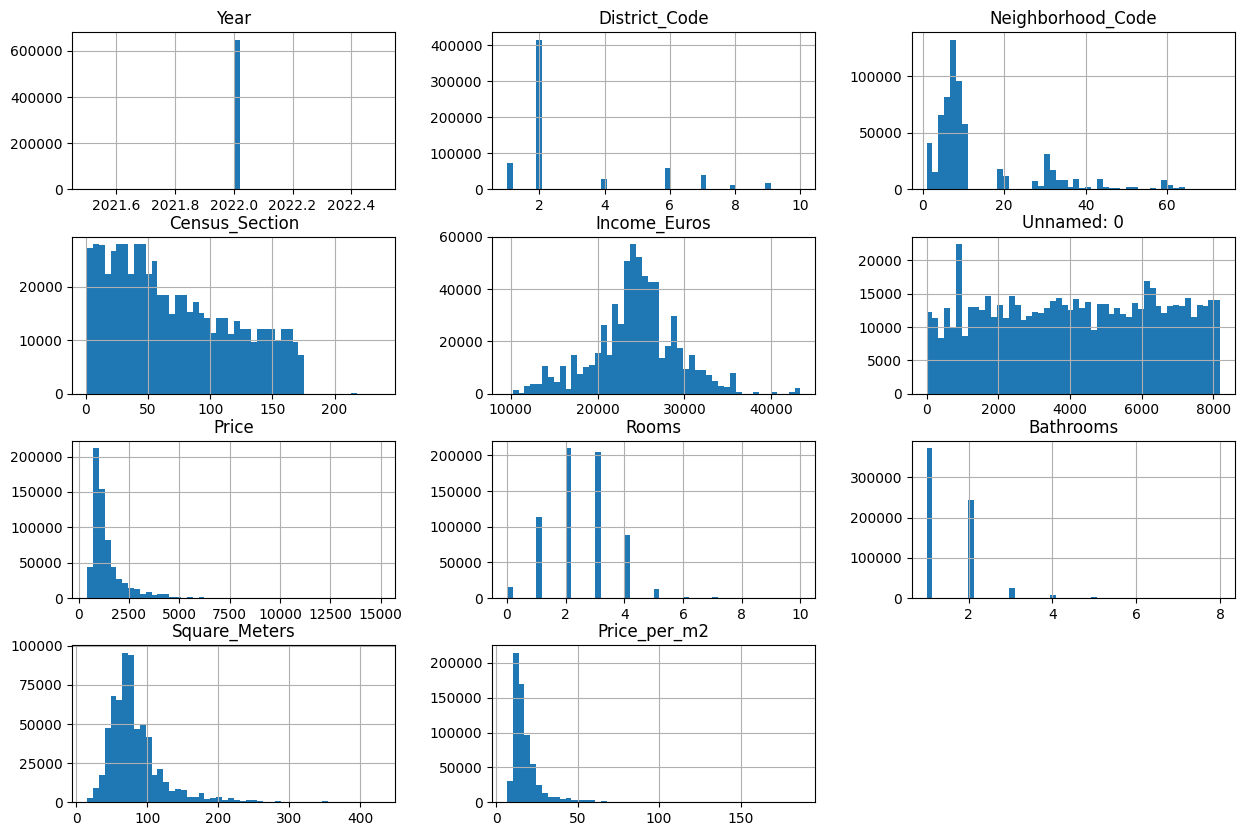

In [21]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
data.hist(bins=50, figsize=(15,10))
plt.show()

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

Recuerden que nuestro set de prueba lo pondremos de lado por ahora, sin verlo. No sean tramposos ❌

In [22]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [23]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.
set_ent, set_prueba = train_test_split(df_filtered,test_size=0.3,random_state=11)


In [24]:
#confirmamos la división
print(len(set_ent),len(set_prueba))

453713 194449


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

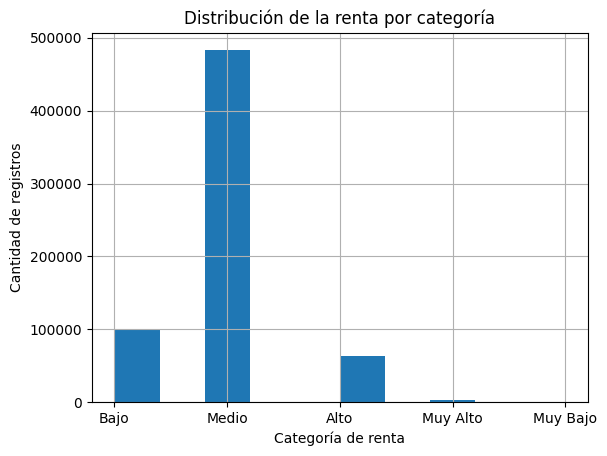

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear categorías de renta
data["income_cat"] = pd.cut(
    data["Income_Euros"],       # variable continua
    bins=[0, 10000, 20000, 30000, 40000, np.inf],   # 5 niveles
    labels=["Muy Bajo", "Bajo", "Medio", "Alto", "Muy Alto"]
)

# Histograma de categorías
data["income_cat"].hist()
plt.title("Distribución de la renta por categoría")
plt.xlabel("Categoría de renta")
plt.ylabel("Cantidad de registros")
plt.show()



In [26]:
#Verificar que no existen datos en el bin #1
data["income_cat"].value_counts()

income_cat
Medio       482935
Bajo         98939
Alto         63116
Muy Alto      3171
Muy Bajo         1
Name: count, dtype: int64

<Axes: >

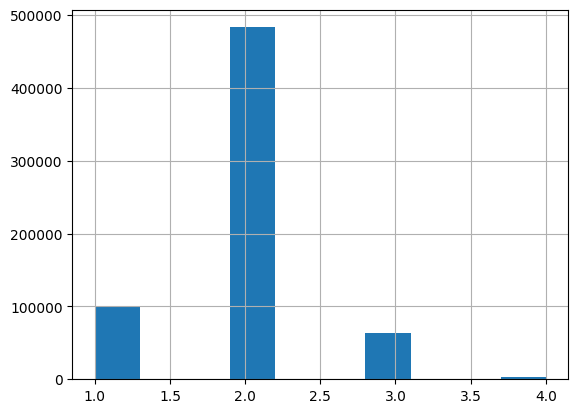

In [27]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset=["Income_Euros"])
data = data.reset_index()
data["income_cat"] =pd.cut(data["Income_Euros"],bins=[10000,20000,30000,40000,np.inf],labels=[1,2,3,4])
data["income_cat"].hist()

In [28]:
#Verifica que si se redefinieron las categorías 
data["income_cat"].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
648157    1
648158    2
648159    1
648160    1
648161    1
Name: income_cat, Length: 648162, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]>

In [29]:
## Dividir datos basándonos en nuestras categorías de salarios
from sklearn.model_selection import StratifiedShuffleSplit


In [30]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=11)

In [31]:
# Mantener solo categorías con al menos 2 registros
counts = data["income_cat"].value_counts()
valid_categories = counts[counts >= 2].index
data = data[data["income_cat"].isin(valid_categories)]

In [32]:
data = data.reset_index(drop=True)


In [33]:
# Creamos nuestras variables basándonos en nuestras categorías
for ent_index, prueba_index in split.split(data, data["income_cat"]):#Definir de nuevo, entrenamiento y prueba peroteniedno en cuenta las nuevas etiquetas para eliminar sesgo
    cat_set_ent = data.loc[ent_index]
    cat_set_prueba = data.loc[prueba_index]

In [34]:
# Comprobación. Ya en porcentaje
cat_set_prueba["income_cat"].value_counts()/len(cat_set_prueba)

income_cat
2   0.75
1   0.15
3   0.10
4   0.00
Name: count, dtype: float64

***

In [35]:
# Creamos dataframe para trabajar con el set de entrenamiento
# Creamos dataframe para trabajar con el set de entrenamiento
df = cat_set_ent.copy()
df.head()

,index,Year,District_Code,distrito,Neighborhood_Code,nom_barrio,Census_Section,Income_Euros,barrio_limpio,Distrito,Unnamed: 0,Price,Rooms,Bathrooms,Lift,Terrace,Square_Meters,Property_Type,Price_per_m2,income_cat
4470,4470,2022,1,ciutat vella,1,el Raval,4,15749,ciutat vella,NaN,"2,362.00","1,200.00",1.00,1.00,False,False,42.00,flat,28.57,1
556002,556002,2022,6,gràcia,31,la Vila de Gràcia,55,25464,gràcia,NaN,"4,300.00","1,180.00",3.00,2.00,True,False,80.00,flat,14.75,2
26881,26881,2022,1,ciutat vella,1,el Raval,20,19278,ciutat vella,NaN,"6,136.00","2,810.00",3.00,2.00,False,False,120.00,apartment,23.42,1
111902,111902,2022,2,eixample,5,el Fort Pienc,16,26542,eixample,NaN,"7,475.00","2,300.00",6.00,2.00,True,False,195.00,flat,11.79,2
445330,445330,2022,2,eixample,10,Sant Antoni,155,22039,eixample,NaN,"6,446.00","1,050.00",1.00,1.00,True,False,54.00,flat,19.44,2


***

## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

In [36]:
!pip install geopandas

In [37]:
import geopandas as gpd

#Leer el mapa
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'
districts = gpd.read_file(url)

print("Datos cargados correctamente.")
districts.head()


Datos cargados correctamente.


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."


In [38]:
print(districts)


  ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
1       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
2       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
3       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
4       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
5       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
6       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
7       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
8       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
9       01   Grup - I    0104  Unitats Administratives     010412  Districtes   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT          ELEM_DESCR  ... ESTIL_ID  \
0   01041201  Districte  0104120101

In [39]:
print(districts.columns.tolist())

['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT', 'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR', 'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE', 'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL', 'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1', 'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID', 'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS', 'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7', 'geometry']


<Axes: >

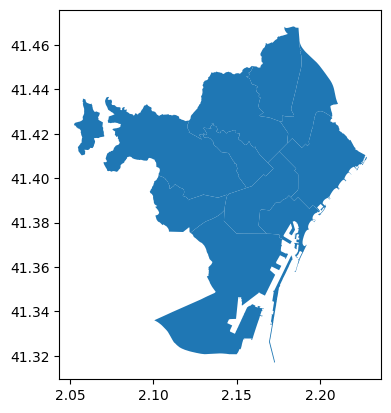

In [40]:
# Graficamos el mapa
districts.plot()

In [41]:
import pandas as pd
import geopandas as gpd

# Definición del mapa de nombres (Formato de Capitalización Deseado)
mapa_nombres = {
    '01': 'ciutat vella',
    '02': 'eixample',
    '03': 'sants-montjuïc',
    '04': 'les corts',
    '05': 'sarrià-sant gervasi',
    '06': 'gràcia',
    '07': 'gorta-guinardó',
    '08': 'nou barris',
    '09': 'sant andreu',
    '10': 'aant martí'
}

# --- CÓDIGO FUNCIONAL ---

# 0. NORMALIZAR: Asegurarse de que todas las columnas, incluida 'DISTRICTE', estén en minúsculas.
districts.columns = districts.columns.str.lower()

# 1. Renombrar la columna del código.
# La columna real es 'districte' (después de aplicar lower).
districts = districts.rename(columns={'districte': 'codi_districte'})


# 2. Mapear el código de distrito para obtener el nombre
# Ahora que 'codi_districte' existe, podemos usarla para crear la columna 'area'.
districts['distrito'] = districts['codi_districte'].astype(str).str.zfill(2).map(mapa_nombres) 

# 3. Seleccionar las columnas clave y el nombre del distrito
districts = districts.filter(items=["distrito", "codi_districte", "id_conjunt", "geometry"])

print("--- GeoDataFrame Arreglado y Nombrado Correctamente ---")
print(districts.head(10))

--- GeoDataFrame Arreglado y Nombrado Correctamente ---
              distrito codi_districte id_conjunt  \
0         ciutat vella             01     010412   
1             eixample             02     010412   
2       sants-montjuïc             03     010412   
3            les corts             04     010412   
4  sarrià-sant gervasi             05     010412   
5               gràcia             06     010412   
6       gorta-guinardó             07     010412   
7           nou barris             08     010412   
8          sant andreu             09     010412   
9           aant martí             10     010412   

                                            geometry  
0  POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...  
1  POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2...  
2  MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3...  
3  POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2...  
4  MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4...  
5  POLYGON ((2.13629 41.42363, 2.1364 41.

***

***

In [42]:
# Seleccionar datos de nuestro set de entrenamiento
df_m = df.groupby("distrito").agg({"Income_Euros":["mean"],"Price":"sum"})
df
# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice
df_m.columns = ["Income_Euros", "Price"]
df_m.reset_index(inplace=True)
pd.options.display.max_rows = None
df_m


,distrito,Income_Euros,Price
0,ciutat vella,"17,034.83","62,359,153.00"
1,eixample,"26,007.09","462,478,660.00"
2,gràcia,"25,277.91","49,723,569.00"
3,horta-guinardó,"20,735.09","24,505,921.00"
4,les corts,"29,392.67","33,595,705.00"
5,nou barris,"17,084.90","7,497,482.00"
6,sant andreu,"20,706.81","10,586,061.00"
7,sant martí,"21,238.81",0.00
8,sants-montjuïc,"20,440.76",0.00
9,sarrià-st. gervasi,"35,100.08",0.00


In [43]:
# Combinar dtaframes
districts = pd.merge(districts,df_m,on="distrito")
districts.head()

,distrito,codi_districte,id_conjunt,geometry,Income_Euros,Price
0,ciutat vella,01,010412,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","17,034.83","62,359,153.00"
1,eixample,02,010412,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2...","26,007.09","462,478,660.00"
2,sants-montjuïc,03,010412,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3...","20,440.76",0.00
3,les corts,04,010412,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2...","29,392.67","33,595,705.00"
4,gràcia,06,010412,"POLYGON ((2.13629 41.42363, 2.1364 41.42358, 2...","25,277.91","49,723,569.00"


***

(np.float64(2.092143437545181),
 np.float64(2.216407557085072),
 np.float64(41.3094755699351),
 np.float64(41.475860544851926))

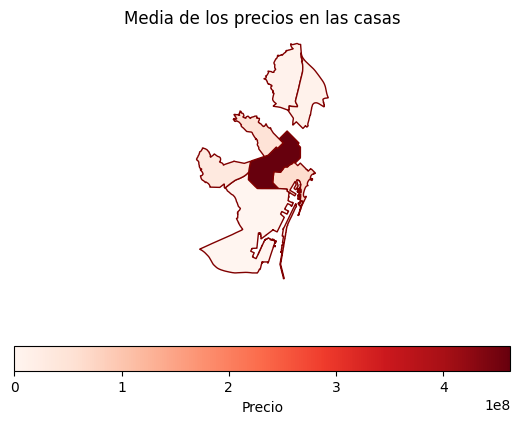

In [44]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal. 
plt = districts.plot(column = "Price", #Columna en la que se basa la gráfica
                        cmap = "Reds", #Color gradiente de la gráfica
                        edgecolor="maroon", #Color de contorno
                        legend = True, legend_kwds ={"label":"Precio","orientation":"horizontal"}) #leyenda
plt.set_title("Media de los precios en las casas")
plt.axis("off")

(np.float64(2.092143437545181),
 np.float64(2.216407557085072),
 np.float64(41.3094755699351),
 np.float64(41.475860544851926))

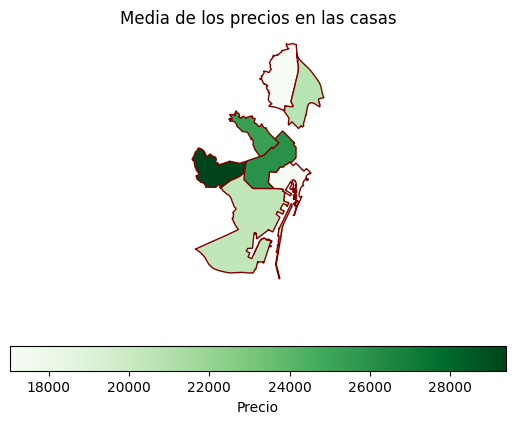

In [45]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal. 
plt = districts.plot(column = "Income_Euros", #Columna en la que se basa la gráfica
                        cmap = "Greens", #Color gradiente de la gráfica
                        edgecolor="maroon", #Color de contorno
                        legend = True, legend_kwds ={"label":"Precio","orientation":"horizontal"}) #leyenda
plt.set_title("Media de los precios en las casas")
plt.axis("off")

**Ejercicio:** Incluir en el análisis los salarios promedio por zona (apoyarse del video 21)

***

## <span style="color:green">5. Medir la Correlación </span>


In [46]:
# Crear matriz de correlaciónç
df = df.drop("Year", axis=1)

numeric_df = df.select_dtypes(include=["number"])
matriz = numeric_df.corr(method="pearson") #metodo.corr crea la matriz de correlación y usamos el método pearson que es el más común

# Comparar correlación
matriz["Price"].sort_values(ascending=False)

Price                1.00
Price_per_m2         0.63
Square_Meters        0.56
Bathrooms            0.49
Rooms                0.25
Income_Euros         0.13
Census_Section       0.07
Unnamed: 0           0.01
index               -0.09
District_Code       -0.18
Neighborhood_Code   -0.18
Name: Price, dtype: float64

<Axes: >

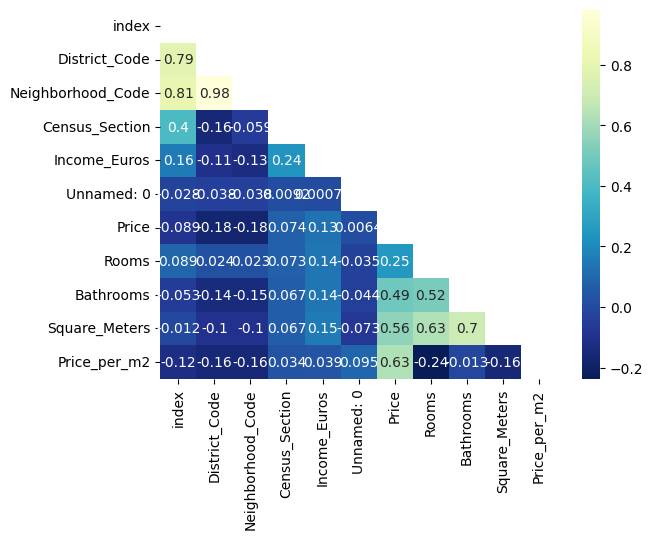

In [47]:
#Importar seaborn 
import seaborn as sb

# Crear vector
mask = np.triu(np.ones_like(matriz, dtype = bool))

# Graficar
plt = sb.heatmap(matriz, mask = mask,annot = True, cmap = "YlGnBu_r")
plt

In [ ]:
#Importar pandas 
from pandas.plotting import scatter_matrix

#Para graficar scatter_matrix...
columns=["Price","Income_Euros","Square_Meters","Price_per_m2"]
scatter_matrix(df[columns],figsize=(12,12),color = "#D52b06",alpha = 0.3,hist_kwds = {"color":{"bisque"},"edgecolor":"firebrick"});

In [ ]:
#Por si quieren ver una gráfica en específico más a detalle


***

## <span style="color:green">6. Combinación de Variables </span>


In [ ]:
#Armar una columna para hacer las combinaciones que necesitamos

# Crear matriz de correlación


***

***

## <span style="color:Blue">7. Transformación de Datos </span>


In [ ]:
# Crear Dataframe de predictores y variable a predecir ✂️

#Nuevo dataframe sin average_price


***

In [ ]:
#Darte una idea de a qué variables le hace faltan datos

#Calcular la suma de todos los vacíos  


In [ ]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 


In [ ]:
#Tomamos la media 

#Llenamos los valores con la media

#Verifica que no hay datos vacíos


***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio

In [ ]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. 
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer


# 2. Crear objeto, en este caso se llamará imputer



# data numérico


#Ejecuta Imputer


#Aplicar transform para rellenar las medianas 


#Regresarlo a dataframe 


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

In [ ]:
#definir que variable vamos a cambiar a valor numérico

#Convertir variables de texto en numéricas

#verificar que si se haya transformado


#Por si quieres ver como funciona el encoder


In [ ]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder

#Crear objeto

#Ajustar

#obligar a que nos muestre la matriz 


***

## <span style="color:Blue">9. Escalación de variables </span>


#### <span style="color:Blue">9.1 Normalización </span>

In [ ]:
#Importar MinMaxScaler

#Creamos el objeto 

#Hacer un dataframe con la transformación


#### <span style="color:Blue">9.2 Estandarización </span>

In [ ]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 

#Crea objeto

#Hacer un dataframe con la transformación


***

## <span style="color:Blue">10. Pipeline </span>


In [ ]:
# Crear función de pipeline


In [ ]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)

#Hacer un datframe que usaremos para la regresión linea

#Visualiza los datos 


***

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [ ]:
## Hacer Regresión Lineal (AL FIN)


In [ ]:
#Análisis preambultario de los errores


***

#### <span style="color:purple">11.1 RMSE </span>

In [ ]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE


In [ ]:
#Sacar el promedio 


In [ ]:
#Calcular el porcentaje de acierto


***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

In [ ]:
# importar DecisionTreeRegressor

#crear objeto 

#correrlo


#calcular el error


***

#### <span style="color:purple">11.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [ ]:
#Importar cross_val_score, creo objeto, corro mi función


In [ ]:
#Calcular el porcentaje de acierto de validación cruzada 


***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>
¡Este también es importante!

In [ ]:
#Importar RandomForestRegressor, creo objeto, corro mi función


#calcular el error


In [ ]:
#Calcular el el promedio de la suma de los errores al cuadrado


In [ ]:
#Calcular el porcentaje de acierto de bosque aleatorio


***

## <span style="color:purple">12. Afinar el modelo </span>

### <span style="color:purple">12.1 Grid Search</span>

In [ ]:
#Importar GridSearchCV


### <span style="color:purple">12.2 set de prueba</span>

In [ ]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 


#Aquí definimos cuál será nuestra variable a predecir y las predichas 



#Ahora, sí. El pipeline para limpieza de datos 



#Por último, ver el error del modelo 


In [ ]:
#Ver el porcentaje de acierto
